In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# y_train[4], x_train[4]
y_train[50000], x_train[50000]

In [ ]:
x_train[50000]/255 

3 <class 'numpy.uint8'>


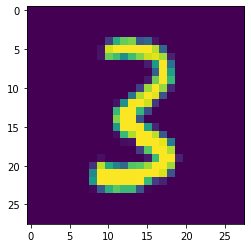

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [6]:
x_train = x_train.reshape(-1, 28*28) / 255
x_train.shape

(60000, 784)

In [7]:
x_test = x_test.reshape(-1, 28*28) / 255
x_test.shape

(10000, 784)

In [8]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [9]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 3이상 --> softmax, binary --> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [12]:
hist = model.fit(x_train, y_train, epochs = 100, validation_split = 0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3211 - acc: 0.9065 - val_loss: 0.2070 - val_acc: 0.9393
Epoch 2/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1411 - acc: 0.9580 - val_loss: 0.1471 - val_acc: 0.9569
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1024 - acc: 0.9684 - val_loss: 0.1391 - val_acc: 0.9577
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0799 - acc: 0.9748 - val_loss: 0.1404 - val_acc: 0.9575
Epoch 5/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0644 - acc: 0.9799 - val_loss: 0.1140 - val_acc: 0.9669
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0520 - acc: 0.9831 - val_loss: 0.1191 - val_acc: 0.9662
Epoch 7/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0432 - acc: 0.9863 - val_loss: 0.1163 - val_acc: 0.9679
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [13]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

No handles with labels found to put in legend.


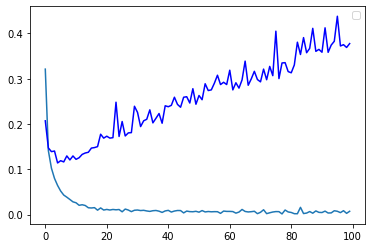

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.legend()
plt.show()

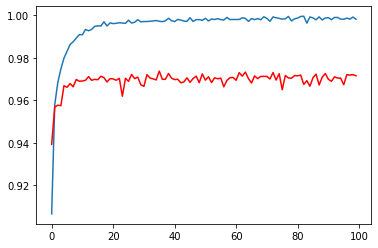

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# Service

In [16]:
# y_test[30]

In [17]:
import numpy as np
# np.set_printoptions(precision = 8)

pred = model.predict(x_test[30:31])
pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.8388003e-32, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [18]:
np.argmax(pred, axis = 1)

array([3])

In [19]:
y_test[30]

3

In [20]:
a = np.arange(6).reshape(2, 3) + 10
print(a)
np.argmax(a, axis = 0)
# reshape(2, 3): 2행 3열
# 0, 1, 2, 3, 4, 5 중 가장 큰 값인 5 출력
# axis = 1: 가장 큰 값이 있는 위치 출력  

[[10 11 12]
 [13 14 15]]


array([1, 1, 1])

In [21]:
np.argmax(np.array([[10, 11, 12]]), axis = 1)

array([2])

In [23]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [24]:
model.save('./model_save01.h5')

In [25]:
model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [26]:
load_pred = model_load.predict(x_test[30:31])
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 5.8388003e-32, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32), 3)